In [1]:
import os
import pandas as pd

In [2]:
# # uncleaned data
# url = 'https://raw.githubusercontent.com/lisb020/scifi_book_game/main/BookList.csv'
# pd_df = pd.read_csv(url)
# pd_df.head()

In [3]:
#cleaned data
url = 'https://raw.githubusercontent.com/lisb020/scifi_book_game/main/cleanedDf.csv'
pd_df = pd.read_csv(url)
pd_df.head()

,Unnamed: 0,Book_Title,Rating_score,Rating_votes,Book_Description,subgenre,rating
0,0,Obsidian,4.17,236780,starting sucks moved right senior year id much...,sf_aliens,2
1,1,Onyx,4.27,153429,connected black sucks thanks alien mojo daemon...,sf_aliens,2
2,2,The 5th Wave,4.03,400600,wave darkness remains nd escape unlucky surviv...,sf_aliens,2
3,3,The Host,3.84,915026,refuses fade away invaded species take minds h...,sf_aliens,1
4,4,Origin,4.35,93979,anything get back successful disastrous mount ...,sf_aliens,2


In [4]:
pd_df.drop(columns="Unnamed: 0", inplace=True)
pd_df.head()

,Book_Title,Rating_score,Rating_votes,Book_Description,subgenre,rating
0,Obsidian,4.17,236780,starting sucks moved right senior year id much...,sf_aliens,2
1,Onyx,4.27,153429,connected black sucks thanks alien mojo daemon...,sf_aliens,2
2,The 5th Wave,4.03,400600,wave darkness remains nd escape unlucky surviv...,sf_aliens,2
3,The Host,3.84,915026,refuses fade away invaded species take minds h...,sf_aliens,1
4,Origin,4.35,93979,anything get back successful disastrous mount ...,sf_aliens,2


In [5]:
import math
def round_down(row):
    if (row['Rating_score']>= 4):
      return str(2)
    elif (row['Rating_score']>= 3.75):
      return str(1)
    else:
      return str(0)


pd_df['rating'] = pd_df.apply (lambda row: round_down(row), axis=1) 

In [6]:
print(pd_df['rating'].value_counts())

2    4230
1    3336
0    2674
Name: rating, dtype: int64


In [7]:
def remove_nums(row):
  output = ''.join(c for c in str(row['Book_Description']) if not c.isdigit())
  return(output)

pd_df['Book_Description'] = pd_df.apply (lambda row: remove_nums(row), axis=1) 

In [8]:
def remove_multi_spaces(row):
  single_spaces = " ".join(str(row['Book_Description']).split())
  return(single_spaces)

pd_df['Book_Description'] = pd_df.apply (lambda row: remove_multi_spaces(row), axis=1)   

In [9]:
def remove_unicode(row):
  string_encode = str(row['Book_Description']).encode("ascii", "ignore")
  return(string_encode.decode())

pd_df['Book_Description'] = pd_df.apply (lambda row: remove_unicode(row), axis=1) 

In [10]:
pd_df['subgenre'].unique()

array(['sf_aliens', 'sf_alternate_history', 'sf_alternate_universe',
       'sf_apocalyptic', 'sf_cyberpunk', 'sf_dystopia', 'sf_hard',
       'sf_military', 'sf_robots', 'sf_space_opera', 'sf_steampunk',
       'sf_time_travel'], dtype=object)

In [11]:
# #####!!!!! run this only when using the cleaned version of the data!!!!!
# import nltk
# nltk.download('stopwords')

# stop_words = nltk.corpus.stopwords.words("english")

# namesurl = 'https://raw.githubusercontent.com/lisb020/scifi_book_game/main/names_data.csv'
# names_df = pd.read_csv(namesurl)

# list_of_names = names_df['name'].to_list()
# name_list = []
# for name in list_of_names:
#     name_list.append(name.lower())

# stop_words.extend(name_list)
# number_words =["one","two","three","four","five","six","seven","eight","nine","ten"]
# stop_words.extend(number_words)
# print(stop_words)
# def filter_stop_words(row, stop_words):
#   desc_list = [word for word in row['Book_Description'].lower().split() if word not in stop_words] 
#   return ' '.join(desc_list) 



In [12]:
## only run this if cleaning a new set of data to remove stop words
#pd_df['Book_Description'] = pd_df.apply (lambda row: filter_stop_words(row,stop_words), axis=1) 

# desc = filter_stop_words(pd_df['Book_Description'].iloc[10].lower(),stop_words)
# print(desc)
#pd_df.to_csv("cleanedDf.csv")

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.regularizers import l1
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer as kerasTokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np


MAX_NB_WORDS = 50000
# This is fixed.
EMBEDDING_DIM = 100
MAX_SEQUENCE_LENGTH = 250

tokenizer = kerasTokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(pd_df['Book_Description'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 49874 unique tokens.


In [14]:
import pickle

# saving
# with open('tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:

X = tokenizer.texts_to_sequences(pd_df['Book_Description'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)


Shape of data tensor: (10240, 250)


In [16]:
#RATING

Y = pd.get_dummies(pd_df['rating']).values
print('Shape of label tensor:', Y.shape)
print(Y)

Shape of label tensor: (10240, 3)
[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [1 0 0]
 [1 0 0]
 [0 1 0]]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.08, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9420, 250) (9420, 3)
(820, 250) (820, 3)


In [19]:
model2 = Sequential()
model2.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model2.add(SpatialDropout1D(0.4))
model2.add(LSTM(100, dropout=0.45, recurrent_dropout=0.45, activity_regularizer=l1(0.002)))
model2.add(Dense(3, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 250, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 3)                 303       
Total params: 5,080,703
Trainable params: 5,080,703
Non-trainable params: 0
_________________________________________________________________
None


In [20]:

epochs = 5
batch_size = 64

history = model2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=4, min_delta=0.0002)])

Epoch 1/5
133/133 [==============================] - 137s 1s/step - loss: 1.0880 - accuracy: 0.4046 - val_loss: 1.0805 - val_accuracy: 0.4108
Epoch 2/5
133/133 [==============================] - 136s 1s/step - loss: 1.0048 - accuracy: 0.5068 - val_loss: 1.0577 - val_accuracy: 0.4522
Epoch 3/5
133/133 [==============================] - 135s 1s/step - loss: 0.7430 - accuracy: 0.6748 - val_loss: 1.2115 - val_accuracy: 0.4682
Epoch 4/5
133/133 [==============================] - 118s 891ms/step - loss: 0.4744 - accuracy: 0.8223 - val_loss: 1.4437 - val_accuracy: 0.4628
Epoch 5/5
133/133 [==============================] - 119s 896ms/step - loss: 0.3020 - accuracy: 0.8942 - val_loss: 1.6411 - val_accuracy: 0.4798


In [23]:
accr = model2.evaluate(X_test,Y_test)
print('Model2 Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

26/26 [==============================] - 1s 57ms/step - loss: 1.5568 - accuracy: 0.4659 0s - loss:
Model2 Test set
  Loss: 1.557
  Accuracy: 0.466


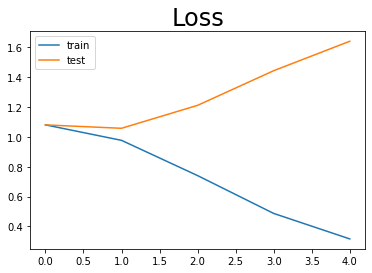

In [24]:
import matplotlib.pyplot as plt
def loss_plot(ax, fontsize=12):
    ax.plot(history.history['loss'], label='train')
    ax.plot(history.history['val_loss'], label='test')
    ax.legend()
    ax.set_title('Loss', fontsize=fontsize)

plt.close('all')
fig, ax = plt.subplots()
loss_plot(ax, fontsize=24)
plt.savefig('rating_model_loss.png')

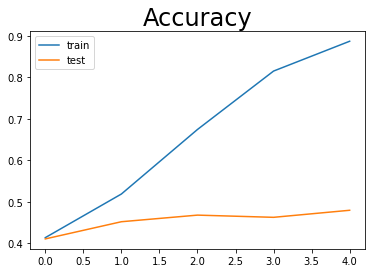

In [25]:
def acc_plot(ax, fontsize=12):
    ax.plot(history.history['accuracy'], label='train')
    ax.plot(history.history['val_accuracy'], label='test')
    ax.legend()
    ax.set_title('Accuracy', fontsize=fontsize)

plt.close('all')
fig, ax = plt.subplots()
acc_plot(ax, fontsize=24)
plt.savefig('rating_model_acc.png')

In [28]:
ratings = ['Great Read', 'Will get Read', 'take a chance']

In [29]:

tokenizer2 = kerasTokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer2.fit_on_texts(pd_df['Book_Description'].values)
word_index = tokenizer2.word_index

In [30]:
# Run with a single input

new_desc = ["The zombie apocalypse is over. The humans have won. Life is back to normal. And Rip is bored as hell. It's not much of a life sitting in a call center in the poor town of Spanish Shanty, Florida, answering emails like a drone and listening to customer complaints."]
seq = tokenizer2.texts_to_sequences(new_desc)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model2.predict(padded)
labels =ratings
print(pred, labels[np.argmax(pred)])

[[0.90116763 0.07792377 0.02090858]] Great Read


In [ ]:
model2.save("rating_trained.h5")